In [ ]:
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import numpy as np
import matplotlib

c:\Users\Nathan\Documents\Coding\PersonalProjects\Machine-Learning-Labs\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


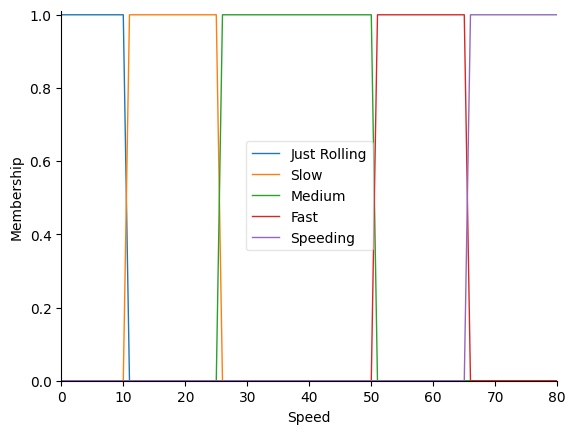

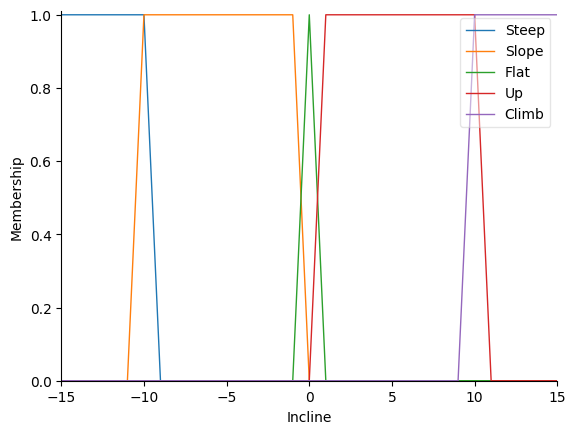

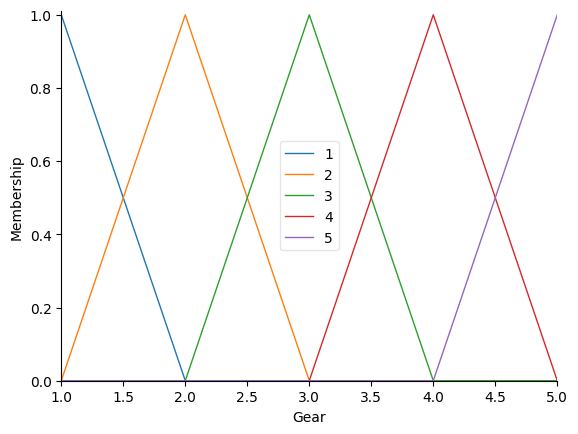

In [ ]:
speed = ctrl.Antecedent(np.arange(0,81,1), 'Speed')
incline = ctrl.Antecedent(np.arange(-15,16,1), 'Incline')
gear = ctrl.Consequent(np.arange(1,6,1), "Gear", 'mom')
gear.automf(names=['1', '2', '3', '4', '5'])

speed['Just Rolling'] = fuzz.trapmf(speed.universe, [0,0,10,10])
speed['Slow'] = fuzz.trapmf(speed.universe, [11,11,25,25])
speed['Medium'] = fuzz.trapmf(speed.universe, [26,26,50,50])
speed['Fast'] = fuzz.trapmf(speed.universe, [51,51,65,65])
speed['Speeding'] = fuzz.trapmf(speed.universe, [66,66,80,80])

speed.view()

incline['Steep'] = fuzz.trapmf(incline.universe, [-15,-15,-10,-10])
incline['Slope'] = fuzz.trapmf(incline.universe, [-10,-10,-1,-1])
incline['Flat'] = fuzz.trapmf(incline.universe, [0,0,0,0])
incline['Up'] = fuzz.trapmf(incline.universe, [1,1,10,10])
incline['Climb'] = fuzz.trapmf(incline.universe, [10,10,15,15])

incline.view()

gear.view()

In [ ]:
rule1 = ctrl.Rule(speed['Just Rolling'] & incline['Slope'] |
                  speed['Just Rolling'] & incline['Flat'] |
                  speed['Just Rolling'] & incline['Up'] |
                  speed['Just Rolling'] & incline['Climb'] |
                  speed['Slow'] & incline['Up'] |
                  speed['Slow'] & incline['Climb'], gear['1'])
rule2 = ctrl.Rule(speed['Just Rolling'] & incline['Steep'] |
                  speed['Slow'] & incline['Slope'] |
                  speed['Slow'] & incline['Flat']|
                  speed['Medium'] & incline['Climb'], gear['2'])
rule3 = ctrl.Rule(speed['Slow'] & incline['Steep'] |
                  speed['Medium'] & incline['Flat'] |
                  speed['Medium'] & incline['Up'], gear['3'])
rule4 = ctrl.Rule(speed['Medium'] & incline['Steep'] |
                  speed['Medium'] & incline['Slope'] |
                  speed['Fast'] & incline['Flat'] |
                  speed['Fast'] & incline['Up'] |
                  speed['Fast'] & incline['Climb'] |
                  speed['Speeding'] & incline['Up'] |
                  speed['Speeding'] & incline['Climb'], gear['4'])
rule5 = ctrl.Rule(speed['Fast'] & incline['Steep'] |
                  speed['Fast'] & incline['Slope'] |
                  speed["Speeding"] & incline['Steep'] |
                  speed['Speeding'] & incline['Slope'] |
                  speed['Speeding'] & incline['Flat'], gear['5'])

system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
gear_selector = ctrl.ControlSystemSimulation(system)

In [ ]:
class conditions:
    def __init__(self, speed, incline):
        self.speed = speed
        self.incline = incline
    

test_cases = [conditions(15, -12), conditions(80, 5), conditions(45, 0), conditions(21, 10), conditions(75, -3)]

for case in test_cases:
    gear_selector.input['Speed'] = case.speed
    gear_selector.input['Incline'] = case.incline
    gear_selector.compute()
    print("When the car speed is " + str(case.speed) + " and the road incline is " + str(case.incline) + " the car should be in gear " + str(gear_selector.output['Gear']))

When the car speed is 15 and the road incline is -12 the car should be in gear 3.0
When the car speed is 80 and the road incline is 5 the car should be in gear 4.0
When the car speed is 45 and the road incline is 0 the car should be in gear 3.0
When the car speed is 21 and the road incline is 10 the car should be in gear 1.0
When the car speed is 75 and the road incline is -3 the car should be in gear 5.0
